## Visualize outputs


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys,inspect
sys.path.insert(0,"..")

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern Roman']})
rc('text', usetex=True)

# Font Size
# import matplotlib
# font = {'family' : 'DejaVu Sans',
#         'weight' : 'bold',
#         'size'   : 12}

import cv2
import numpy as np

In [3]:
def visualize(idx, **images):
    """Plot images in one row.""" 
    n = len(images)
    plt.figure(figsize=(18, 16))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        if idx==0:
            #print(name)
            plt.title(' '.join(name.split('_')).lower(), fontsize=20)
        plt.imshow(image, cmap='gray')
        plt.axis("off")
        plt.tight_layout()
    #plt.savefig("../outs/{}.png".format(idx), facecolor="white", bbox_inches = 'tight', dpi=600)
    #plt.show()
    
    
def make_dataset(dir):
    images = []
    assert os.path.isdir(dir), '%s is not a valid directory' % dir

    f = dir.split('/')[-1].split('_')[-1]
    #print (dir, f)
    dirs= os.listdir(dir)
    for img in dirs:

        path = os.path.join(dir, img)
        #print(path)
        images.append(path)
    return images

def read_image(path):
    image = cv2.imread(path, -1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [4]:
# Path to model
algo1 = "acgpn_5000"
algo2 = "resunet_g1"

# Path to output tryon images
mode = "all" # all, all_same, easy, medium, hard
algo1_tryon_path = "../outputs/{}/{}/".format(algo1, mode)
algo2_tryon_path = "../outputs/{}/{}/".format(algo2, mode)

# File paths
algo1_tryon_files = sorted(make_dataset(algo1_tryon_path))
algo2_tryon_files = sorted(make_dataset(algo2_tryon_path))

# Path to warped clothes mask
gt_wcr_path = "../outputs/{}/{}/".format(algo1, "gt_clothes_mask")
algo1_wcr_path = "../outputs/{}/{}/".format(algo1, "wcrmask")
algo2_wcr_path = "../outputs/{}/{}/".format(algo2, "wcrmask")

# File paths
gt_wcr_files = sorted(make_dataset(gt_wcr_path)) # gt mask
algo1_wcr_path = sorted(make_dataset(algo1_wcr_path)) # algo1 pred
algo2_wcr_path = sorted(make_dataset(algo2_wcr_path)) # algo2 pred

# Path to reference person and cloth images
ref_person_path = "../../datasets/acgpn_data/try_on_testing/"

persons = []
clothes = []

with open(os.path.join("../../datasets/acgpn_data/try_on_testing/test_pairs.txt"), 'r') as f:
    for line in f.readlines():
        h_name, c_name = line.strip().split()
        persons.append(h_name)
        clothes.append(c_name)

ref_person_paths = [os.path.join(ref_person_path, "test_img", x) for x in persons]
target_clothes_paths = [os.path.join(ref_person_path, "test_color", x) for x in clothes]

In [5]:
nums = np.random.randint(0, 2032, 10)
nums

array([  46,  571, 1399, 1137, 1234, 1553,  705, 1559,  311, 1128])

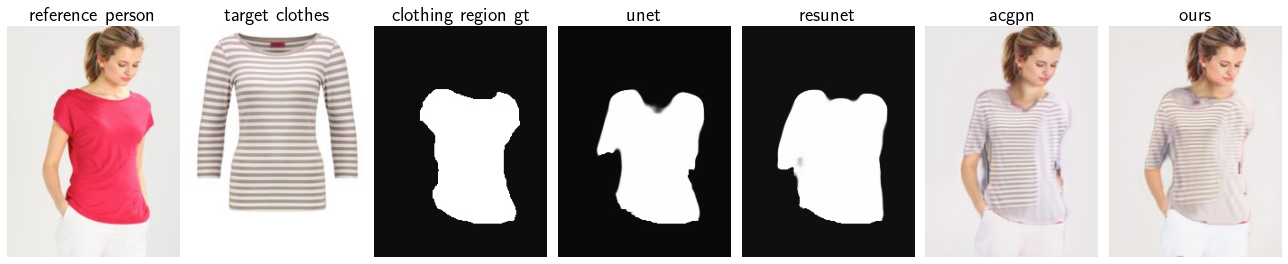

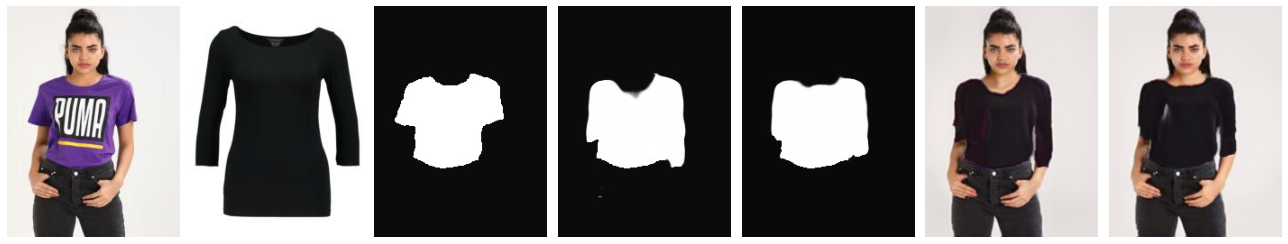

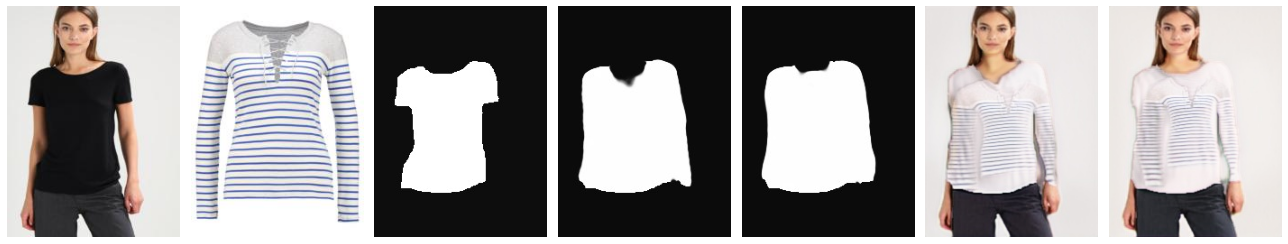

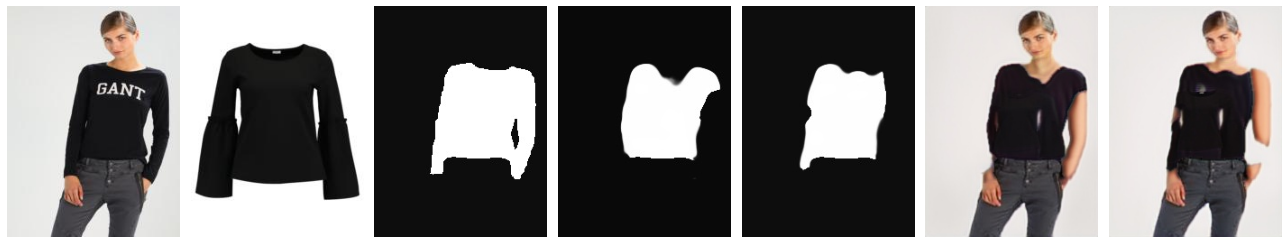

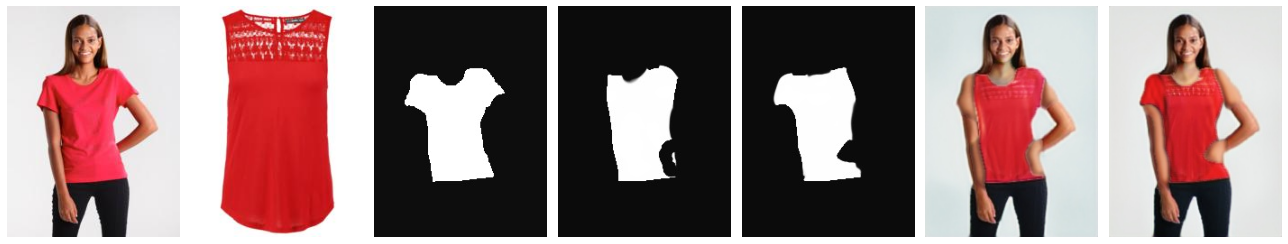

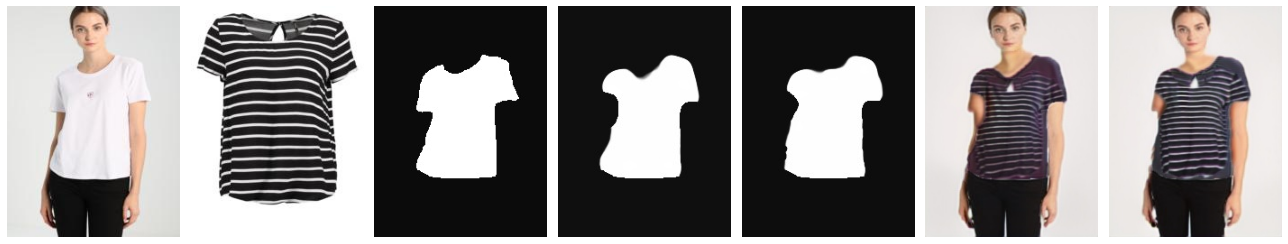

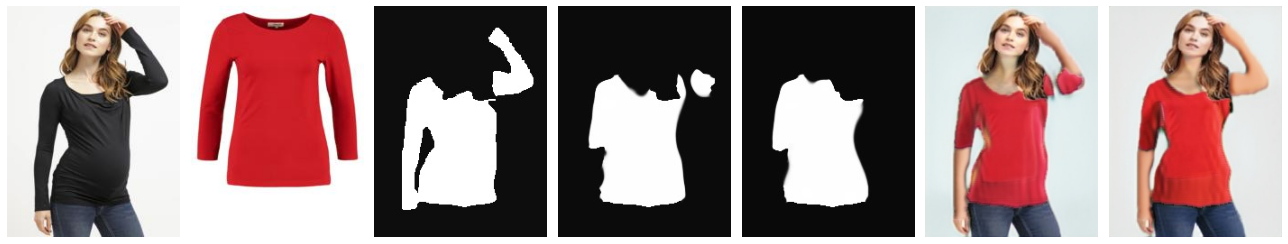

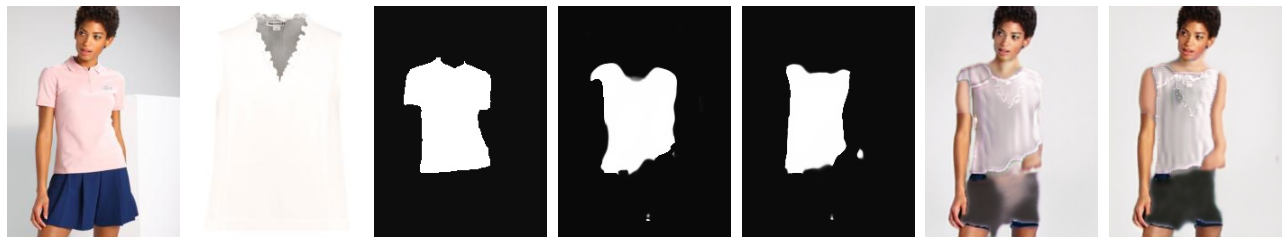

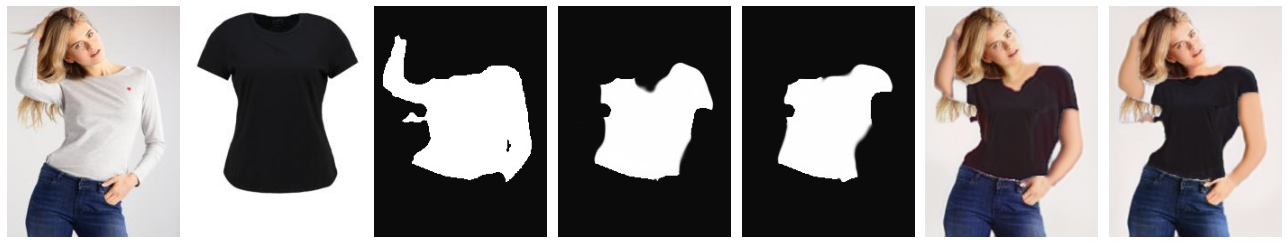

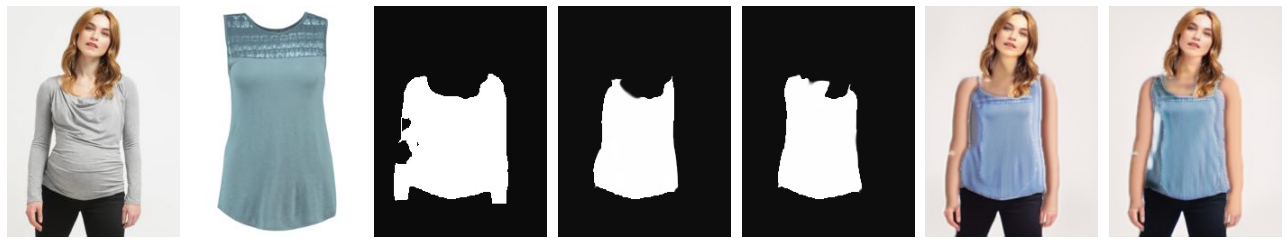

In [6]:
i = 0

for num in nums:
    visualize(i, reference_person=read_image(ref_person_paths[num]), target_clothes=read_image(target_clothes_paths[num]),
              Clothing_Region_GT=read_image(gt_wcr_files[num])[:,:,0], 
              Unet=read_image(algo1_wcr_path[num])[:,:,0], resunet=read_image(algo2_wcr_path[num])[:,:,0],
              ACGPN=read_image(algo1_tryon_files[num]), Ours=read_image(algo2_tryon_files[num]))
    #plt.show()
    i+=1
    
#plt.savefig("../outputs/{}.png".format("visualization.png"), facecolor="white", bbox_inches = 'tight', dpi=600)

In [7]:
# w = 192
# h = 256
# fig = plt.figure(figsize=(18, 16))
# columns = 7
# rows = 7

# for num in nums:
#     i=0
#     reference_person=read_image(ref_person_paths[num])
#     target_clothes=read_image(target_clothes_paths[num])
#     Clothing_Region_GT=read_image(gt_wcr_files[num])[:,:,0]
#     Unet=read_image(algo1_wcr_path[num])[:,:,0]
#     resunet=read_image(algo2_wcr_path[num])[:,:,0]
#     ACGPN=read_image(algo1_tryon_files[num])
#     Ours=read_image(algo2_tryon_files[num])
    
#     imgs = [reference_person, target_clothes, Clothing_Region_GT, Unet, resunet, ACGPN, Ours]
    
#     for i in range(1, columns*rows +1):
#         print(i-1)
#         img = imgs[i-1] #np.random.randint(10, size=(h,w))
#         fig.add_subplot(rows, columns, i)
#         plt.imshow(img, cmap='gray')
#         plt.axis("off")
#         plt.tight_layout()
# plt.show()

In [119]:
# slc = 5
# i = 0
# for refp, clt, gtwcr, a1wcr, a2wcr, a1, a2 in zip(ref_person_paths[:slc], target_clothes_paths[:slc], 
#                   gt_wcr_files[:slc], algo1_wcr_path[:slc], algo2_wcr_path[:slc], algo1_tryon_files[:slc],
#                   algo2_tryon_files[:slc]):

#     visualize(i, reference_person=read_image(refp), target_clothes=read_image(clt),
#               Clothing_Region_GT=read_image(gtwcr)[:,:,0], 
#               Unet=read_image(a1wcr)[:,:,0], resunet=read_image(a2wcr)[:,:,0],
#               ACGPN=read_image(a1), Ours=read_image(a2))
#     #plt.show()
#     i+=1
    
# plt.savefig("../outputs/{}.png".format("visualization.png"), facecolor="white", bbox_inches = 'tight', dpi=600)

In [ ]:
st = "Referenc_person"

In [46]:
stt = ' '.join(st.split('_')).lower()
stt

'referenc person'

In [30]:
# arrs = []
# for refp, clt, gtwcr, a1wcr, a2wcr, a1, a2 in zip(ref_person_paths[:slc], target_clothes_paths[:3], 
#                   gt_wcr_files[:slc], algo1_wcr_path[:slc], algo2_wcr_path[:slc], algo1_tryon_files[:slc],
#                   algo2_tryon_files[:slc]):
    
#     person=read_image(refp)
#     cloth=read_image(clt)

#     wcr=read_image(gtwcr) 
#     #wcr= np.where(wcr==127, 0, wcr)

#     wcr_acgpn=read_image(a1wcr) 
#     #wcr_acgpn= np.where(wcr_acgpn==127, 0, wcr_acgpn)

#     wcr_ours=read_image(a2wcr)
#     #wcr_ours= np.where(wcr_ours==127, 0, wcr_ours)

#     acgpn=read_image(a1)
#     ours=read_image(a2)
    
#     out = np.hstack((person, cloth, wcr, wcr_acgpn, wcr_ours, acgpn, ours))
#     out = np.pad(out, pad_width=1, mode='constant', constant_values=0)
#     arrs.append(out)    

In [32]:
# final_output = np.vstack((x for x in arrs))
# final_output.shape

In [ ]:
# plt.figure(figsize=(18, 16))
# plt.axis("off")
# plt.imshow(final_output);